Modifying and optimizing merge sort by incorporating insertion sort. 

Insertion sort, when implemented properly, is a stable sort. Merge sort, when implemented properly, is similarly a stable sort. However, merge sort is not very efficient when n is small. There is just too much overhead associated with recursions and memory management. Insertion sort, on the other hand, will perform much worse than merge sort for large n; but, much better for small n. Consequently, there is a great opportunity here to create a stable sort that is even faster than either on its own.

What I would like you to do is to create a combination of merge and insertion sorts. Basically, you will start with the merge sort algorithms that we created in class. Then, you will modify the base case and when it is invoked by including an insertion sort for the base case. Note, because we are using an insertion sort as the base case, the merge sort algorithm no longer needs to keep breaking up the sub-lists until len(lst)<=1. For example, even if we have 1000 elements in a sub-list that needs to be sorted, we can simply sort these with insertion sort and not bother recursing further.

In other words, say we start with a list that is 10,000 elements long that we are sorting. In the first call to the merge sort’s recursive part, we would break the list into two sub-lists that are 5,000 elements long. In the next one, we will break each of these into 2,500. Then, 1250. Then, 625. At that point, we may say, enough recursion, let insertion sort handle the 625. Once insertion sort does its magic on two sub-lists of 625, merge sort would then combine the two sub-lists into a single sorted sub-list of 1,250 like it would have done without the modification at that level on the call stack.

What I would like you to do in this notebook is to implement a combination sort that switches from merge sort to insertion sort for n below a certain threshold. Then, I would like you to time performance of this combo sort. (You are strongly encouraged to paste all of this together from the code that is uploaded to H0 and W1.) 
By changing values of the threshold to when we switch from merge to insertion, optimize this threshold for your machine. Hint, I would be very surprised if it was around 1000. 

Please, have your notebook explain/demonstrate how you got to this value of the threshold as clearly as possible. Take care not to make it messy. Think of it as a short report that you are sharing with your boss who will want to show it off to the executive committee of the company you work for. Also, in this report, contrast the performance of this algorithm with performance of the original merge sort. 

You may work with others on all conceptual parts of this assignment. Please be courteous to your fellow students and make an effort to include ones that may not be working with anyone else. However, everyone is responsible for their own submission, on their own branch. There, I expect you to explain what you did in your own words. Also, once you figure out what needs to be done (and which parts of our code from class to use where) I would like you to put it together yourself. I.e., do not blindly copy your fellow students code that you may have even partially contributed to. You will not learn to debug and put code together on your own quickly and efficiently if you let someone else do it for you.


In [1]:
import numpy as np
import random
import time
import matplotlib.pyplot as pplot

In [2]:
def merge_sorted_lists(lst1,lst2):
    n1 = len(lst1)
    n2 = len(lst2)
    i1 = 0
    i2 = 0
    out_list = []
    while i1 < n1 and i2<n2:
        if lst1[i1] < lst2[i2]:
            out_list.append(lst1[i1])
            i1 += 1
        else:
            out_list.append(lst2[i2])
            i2 += 1
    out_list = out_list + lst1[i1:] + lst2[i2:]
    return out_list

In [3]:
def insertionSort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
#Moving elements that are greater than the key ahead of the current positon. 
        j = i-1
        while j>=0 and key < arr[j]:
                arr[j+1] = arr[j]
                j -= 1
        arr[j+1] = key
    return(arr)
#Referenced: https://www.geeksforgeeks.org/python-program-for-insertion-sort/

In [4]:
def getNextGap(gap):
    gap = (gap * 10)//13
    if gap <1:
        return 1
    return gap
#The find next gap will shrink the gap by a factor of 1.3.
#Shrinking applies to every interation untul it reaches the value of 1. 
#Reference: https://www.geeksforgeeks.org/comb-sort/

In [5]:
def comboSort(arr):
    n = len(arr)
    gap = n
    swapped = true #Swapped as true will make sure that the loops runs. 
    while gap !=1 or swapped == 1:
        gap = getNextGap(gap)
        swapped = False #Swapped as false will show if the swap occured. 
        for i in range(0, n-gap):
            if arr[i] > arr[i + gap]:
                arr[i], arr[i + gap]=arr[i + gap]
                swapped = True

In [18]:
def building_counting_arrays(arrays_of_n, array_of_timing, function_to_time):
#We are defining the time complexity and arrays of sorting function. Allowing us to pplot as a fuction of matplotlib.
    n = 10 #defining n
    while n <= 10000:
        array_of_n.append(n)
        rand_list=[]
        for i in range(10000): rand_list.append(random.randint(0,1000000))
        t1 = time.perf_counter()
        array_of_timings.append(time.perf_counter() - t1)
        n += 100

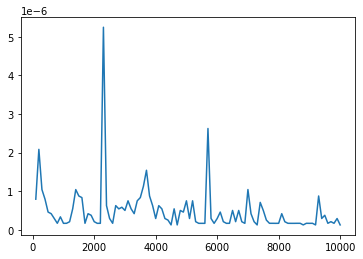

In [7]:
array_of_n = []
array_of_timings = []
building_counting_arrays(array_of_n,array_of_timings,comboSort)
pplot.plot(array_of_n,np.array(array_of_timings))
pplot.show()
#printing the time complexity of comboSort.

In [8]:
#The graph above shows that the time complexity is faster than the orginal mergSort.

In [24]:
import numpy as np
import random
import time
import matplotlib.pyplot as pplot

In [25]:
def merge_sorted_lists(lst1,lst2):
    n1 = len(lst1)
    n2 = len(lst2)
    i1 = 0
    i2 = 0
    out_list = []
    while i1 < n1 and i2<n2:
        if lst1[i1] < lst2[i2]:
            out_list.append(lst1[i1])
            i1 += 1
        else:
            out_list.append(lst2[i2])
            i2 += 1
    out_list = out_list + lst1[i1:] + lst2[i2:]
    return out_list

In [26]:
def merge_sort(lst):
    if len(lst) <= 1: return lst
    mid = len(lst)//2
    return merge_sorted_lists(merge_sort(lst[:mid]),merge_sort(lst[mid:]))

In [27]:
def building_counting_arrays(arrays_of_n, array_of_timing, function_to_time):
#We are defining the time complexity and arrays of sorting function. Allowing us to pplot as a fuction of matplotlib.
    n = 100 #defining n
    while n <= 10000:
        array_of_n.append(n)
        rand_list=[]
        for i in range(10000): rand_list.append(random.randint(0,1000000))
        t1 = time.perf_counter()
        array_of_timings.append(time.perf_counter() - t1)
        n += 100

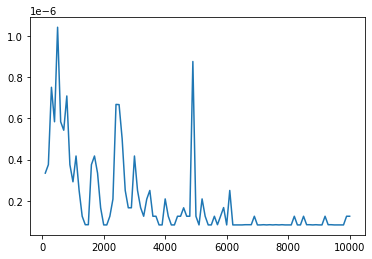

In [28]:
array_of_n = []
array_of_timings = []
building_counting_arrays(array_of_n,array_of_timings,merge_sort)
pplot.plot(array_of_n,np.array(array_of_timings))
pplot.show()
#printing the time complexity of mergeSort.

In [29]:
#The orginal mergSort seems to be a little bit slower and more expensive comparative to the the comboSort. 

In [30]:
#If I was to explain this to my boss, I would say that using the combo sort would be efficient in the long run to complete given objectives. 
#In some cases where the bubble sort or mergeSort would be more effective with worst-case remaining O(n^2).